In [1]:
import pandas as pd
import numpy as np

# Load the new data
cleaned_data = pd.read_csv('master_final.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

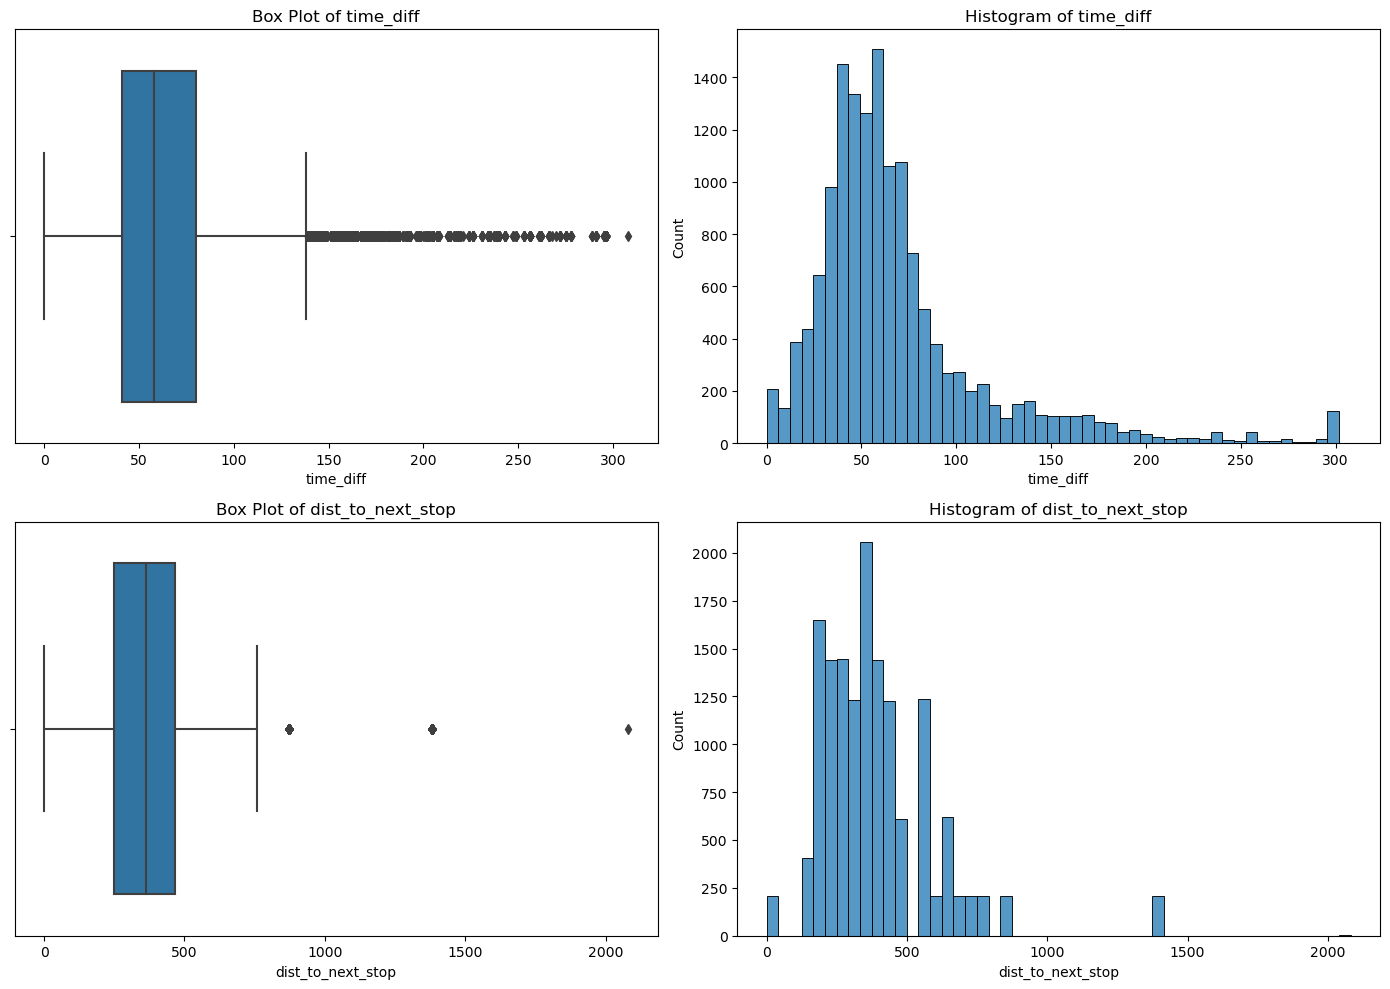

In [2]:
#OUTLIER DETECTION

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Box plot for 'time_diff'
sns.boxplot(x=cleaned_data['time_diff'], ax=ax[0, 0])
ax[0, 0].set_title('Box Plot of time_diff')

# Histogram for 'time_diff'
sns.histplot(cleaned_data['time_diff'], bins=50, ax=ax[0, 1])
ax[0, 1].set_title('Histogram of time_diff')

# Box plot for 'dist_to_next_stop'
sns.boxplot(x=cleaned_data['dist_to_next_stop'], ax=ax[1, 0])
ax[1, 0].set_title('Box Plot of dist_to_next_stop')

# Histogram for 'dist_to_next_stop'
sns.histplot(cleaned_data['dist_to_next_stop'], bins=50, ax=ax[1, 1])
ax[1, 1].set_title('Histogram of dist_to_next_stop')

# Display the plots
plt.tight_layout()
plt.show()


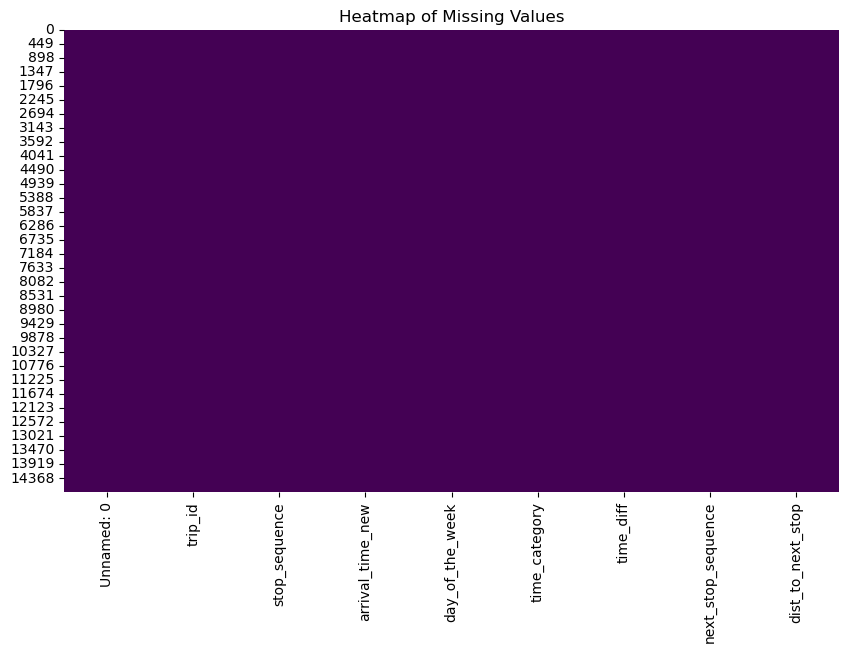

In [3]:
#NULL VALUE VISUALIZATION

# Check for missing values
missing_values = cleaned_data.isna()

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

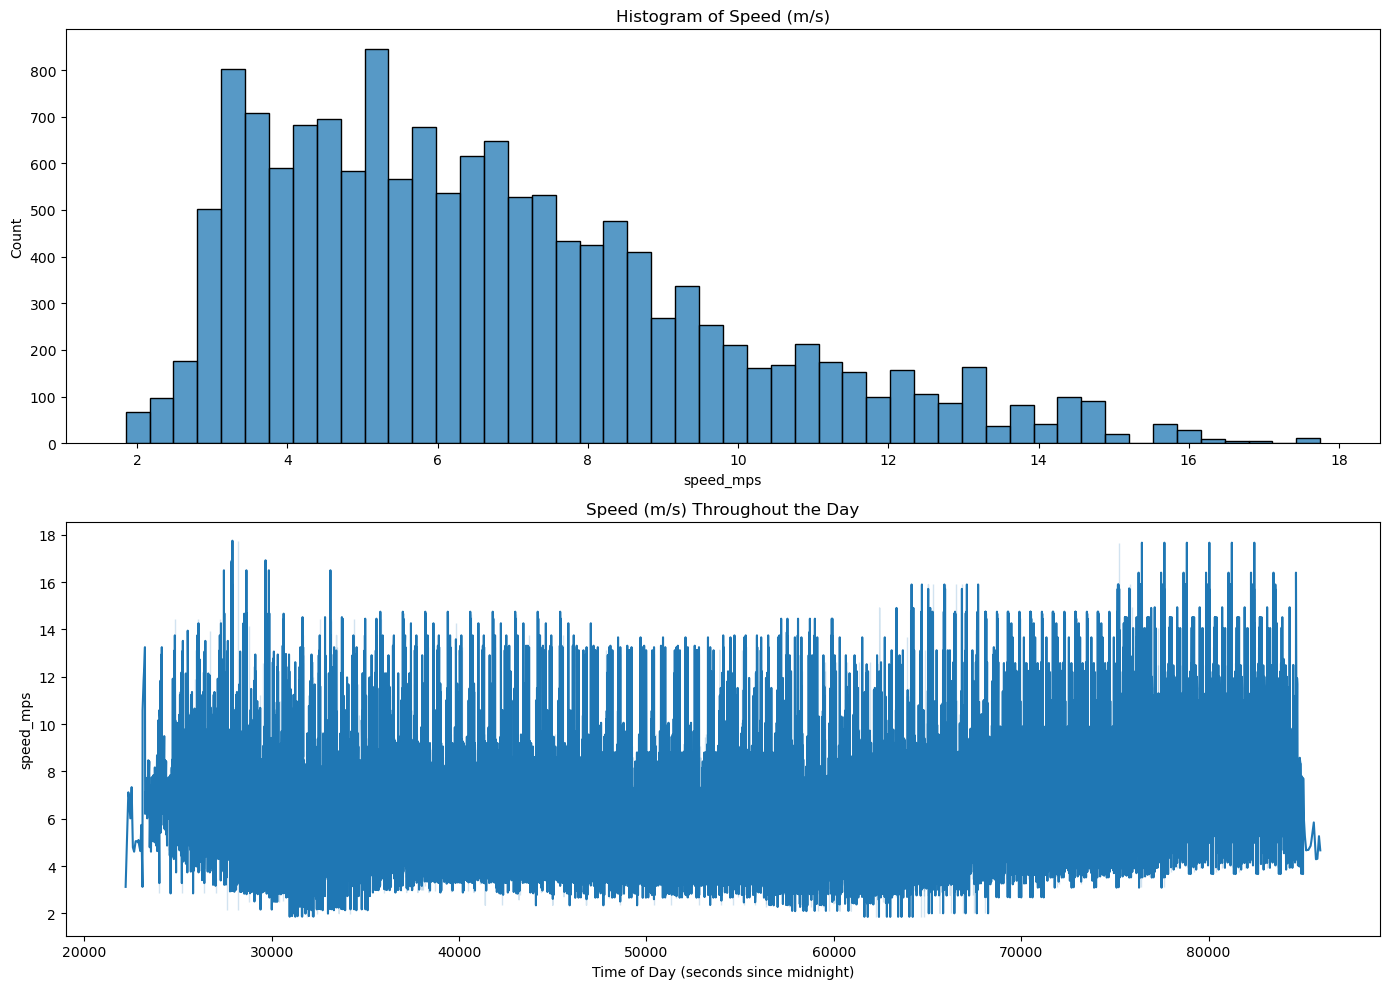

In [5]:
#Visualizing Speeds

# Convert 'arrival_time_new' to timedelta format
cleaned_data['arrival_time_new'] = pd.to_timedelta(cleaned_data['arrival_time_new'])

# Calculate the speed as the ratio of 'dist_to_next_stop' to 'time_diff'
cleaned_data['speed_mps'] = cleaned_data['dist_to_next_stop'] / cleaned_data['time_diff']

# Replace any speed that's based on a zero 'dist_to_next_stop' or 'time_diff' value with NaN
cleaned_data.loc[(cleaned_data['dist_to_next_stop'] == 0) | (cleaned_data['time_diff'] == 0), 'speed_mps'] = np.nan

# Set up the figure and axes for a 2x1 grid of plots
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Histogram for 'speed_mps'
sns.histplot(cleaned_data['speed_mps'], bins=50, ax=ax[0])
ax[0].set_title('Histogram of Speed (m/s)')

# Time series plot of speed throughout the day
cleaned_data['arrival_time_seconds'] = cleaned_data['arrival_time_new'].dt.seconds
sns.lineplot(x='arrival_time_seconds', y='speed_mps', data=cleaned_data, ax=ax[1])
ax[1].set_title('Speed (m/s) Throughout the Day')
ax[1].set_xlabel('Time of Day (seconds since midnight)')

# Display the plots
plt.tight_layout()
plt.show()


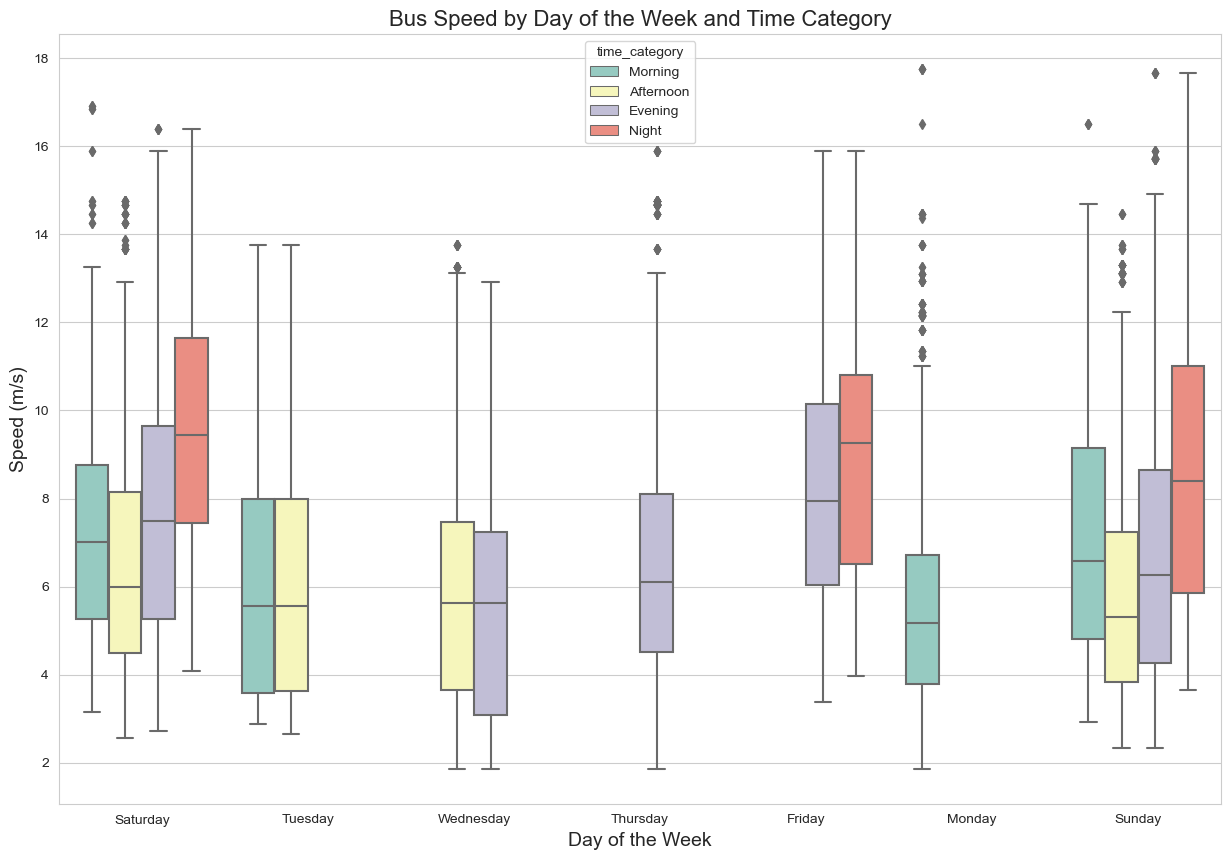

In [8]:
#Bus speed by the day of the week

# Sort the data by trip_id and stop_sequence
cleaned_data = cleaned_data.sort_values(by=['trip_id', 'stop_sequence'])

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style("whitegrid")

# Create a box plot of speed by day of the week and time category
plt.figure(figsize=(15, 10))
sns.boxplot(x='day_of_the_week', y='speed_mps', hue='time_category', data=cleaned_data, palette='Set3')

# Set plot title and labels
plt.title('Bus Speed by Day of the Week and Time Category', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Speed (m/s)', fontsize=14)

# Show the plot
plt.show()


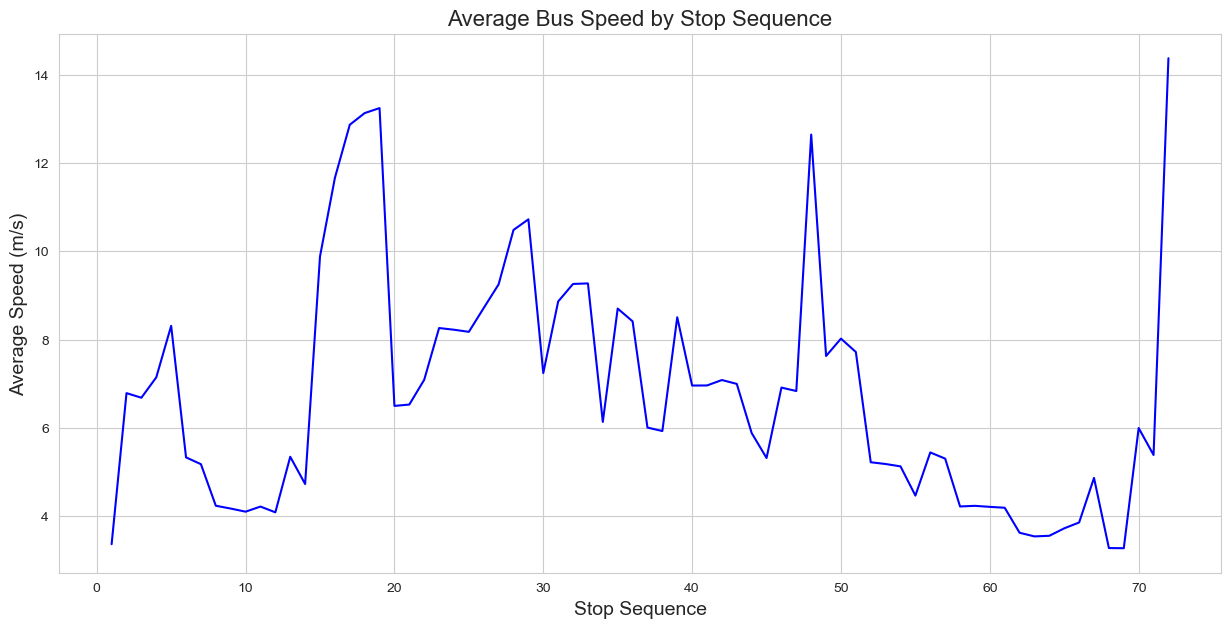

In [9]:
# Calculate average speed for each stop sequence
avg_speed_by_stop_sequence = cleaned_data.groupby('stop_sequence')['speed_mps'].mean().reset_index()

# Create a line plot of average speed by stop sequence
plt.figure(figsize=(15, 7))
sns.lineplot(x='stop_sequence', y='speed_mps', data=avg_speed_by_stop_sequence, color='blue')

# Set plot title and labels
plt.title('Average Bus Speed by Stop Sequence', fontsize=16)
plt.xlabel('Stop Sequence', fontsize=14)
plt.ylabel('Average Speed (m/s)', fontsize=14)

# Show the plot
plt.show()

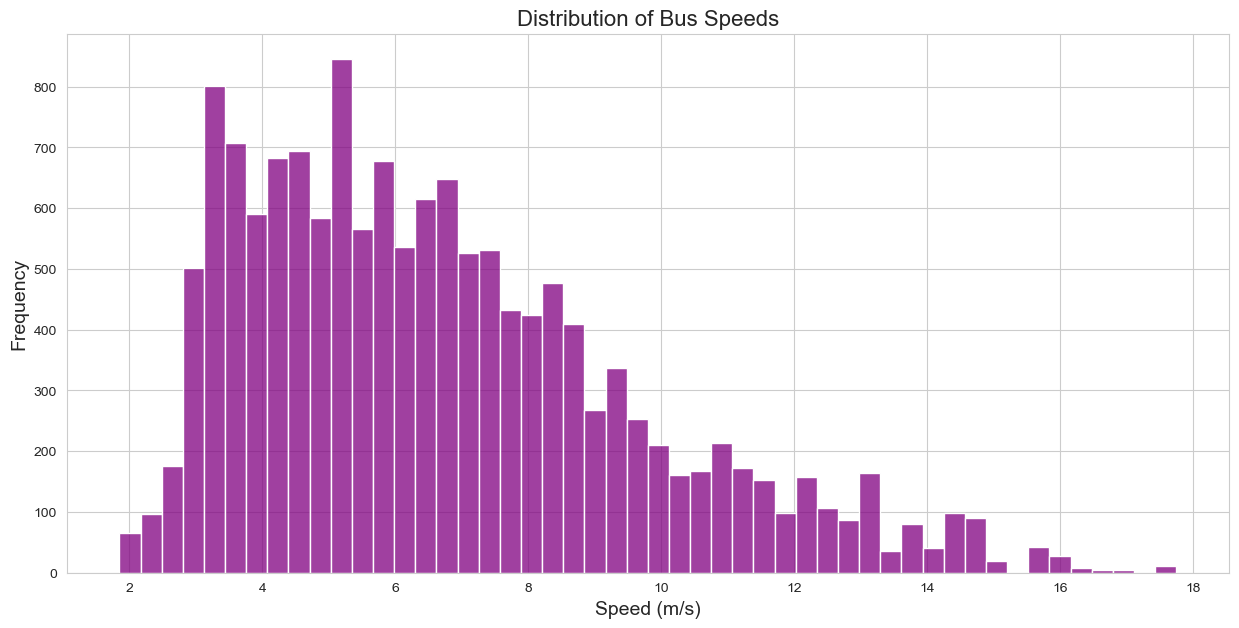

In [10]:
# Create a histogram of speeds
plt.figure(figsize=(15, 7))
sns.histplot(cleaned_data['speed_mps'], bins=50, color='purple')

# Set plot title and labels
plt.title('Distribution of Bus Speeds', fontsize=16)
plt.xlabel('Speed (m/s)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

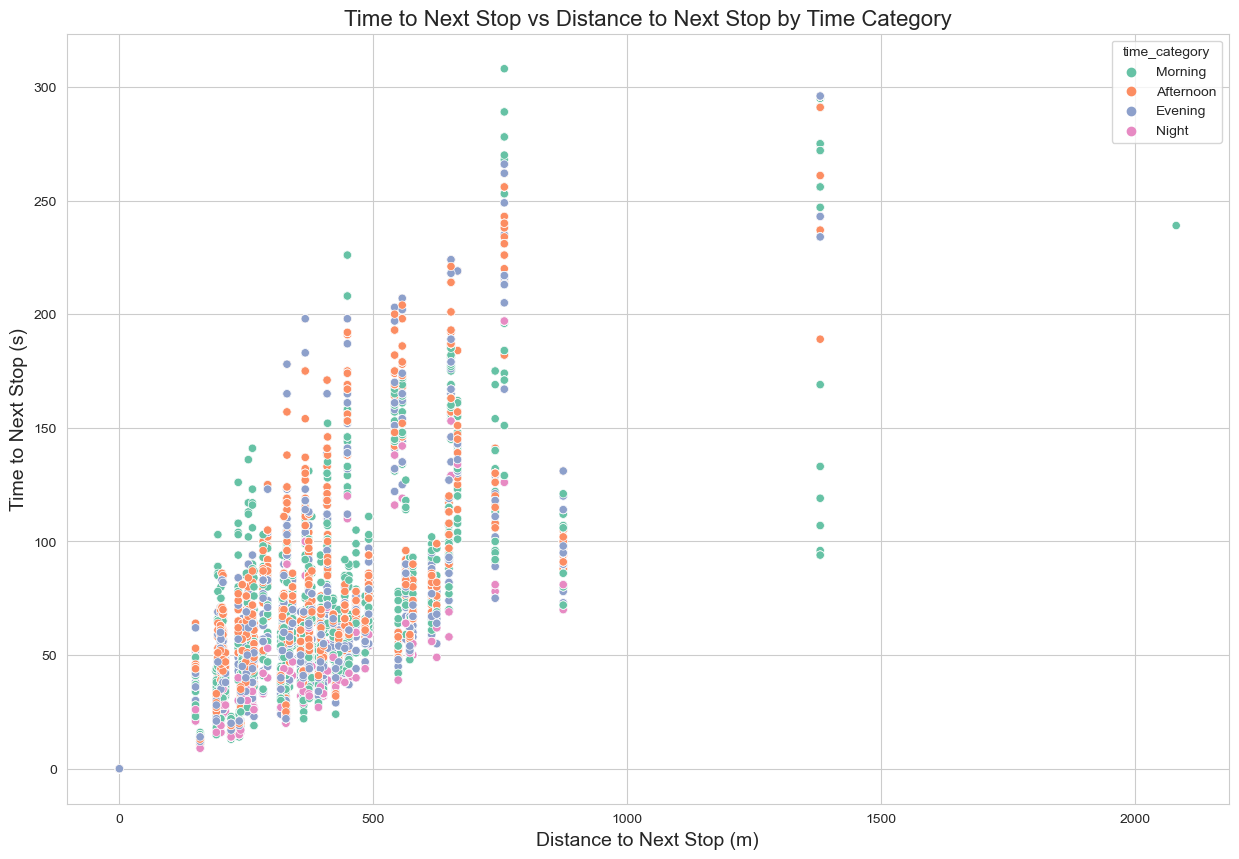

In [11]:
# Create a scatter plot of time_diff against dist_to_next_stop, color-coded by time_category
plt.figure(figsize=(15, 10))
sns.scatterplot(x='dist_to_next_stop', y='time_diff', hue='time_category', data=cleaned_data, palette='Set2')

# Set plot title and labels
plt.title('Time to Next Stop vs Distance to Next Stop by Time Category', fontsize=16)
plt.xlabel('Distance to Next Stop (m)', fontsize=14)
plt.ylabel('Time to Next Stop (s)', fontsize=14)

# Show the plot
plt.show()